# Create the distance from the center column.

## Merge all the places in one dataset.

In [16]:
import pandas as pd

BarcelonaPlaces = pd.read_csv('/workspaces/Coworking/src/results/Barcelona/BarcelonaPlaces.csv')

MadridPlaces = pd.read_csv('/workspaces/Coworking/src/results/Madrid/MadridPlaces.csv')

NYCPlaces = pd.read_csv('/workspaces/Coworking/src/results/New York/NYC_PLaces.csv')

TokyoPlaces = pd.read_csv('/workspaces/Coworking/src/results/Tokyo/TokyoPLaces.csv')

In [17]:
# Extract Latitude, Longitude, and name columns from each dataframe
BarcelonaPlaces = BarcelonaPlaces[['Latitude', 'Longitude', 'Name']]
MadridPlaces = MadridPlaces[['geometry.location.lat', 'geometry.location.lng', 'name']]
NYCPlaces = NYCPlaces[['Latitude', 'Longitude', 'Name']]
TokyoPlaces = TokyoPlaces[['Latitude', 'Longitude', 'Name']]
# Concatenate the dataframes
places = pd.concat([BarcelonaPlaces, MadridPlaces, NYCPlaces, TokyoPlaces])

places.to_csv('/workspaces/Coworking/src/results/Location.csv', index=False)

## Calculate the distance from the center.

In [19]:
places = pd.read_csv('/workspaces/Coworking/src/results/Location.csv')

In [20]:
from geopy.distance import geodesic

# Define City center coordinates
city_centers = {
    "Barcelona": (41.3874, 2.1686),
    "Madrid": (40.4168, -3.7038),
    "New York": (40.7128, -74.0060),
    "Tokyo": (35.682839, 139.759455)
}

# Ensure we have City, Latitude, and Longitude columns
if {"City", "Latitude", "Longitude"}.issubset(places.columns):
    # Function to calculate distance
    def calculate_distance(row):
        City = row["City"]
        if City in city_centers:
            coworking_location = (row["Latitude"], row["Longitude"])
            city_center_location = city_centers[City]
            return geodesic(coworking_location, city_center_location).kilometers
        return None

    # Apply function to calculate distances
    places["distance_from_center"] = places.apply(calculate_distance, axis=1)

    # Show first few rows with new column
    places[["City", "Latitude", "Longitude", "distance_from_center"]].head()
else:
    missing_cols = {"City", "Latitude", "Longitude"} - set(places.columns)
    missing_cols


In [21]:
places.head()

,Latitude,Longitude,Name,City,distance_from_center
0,41.406983,2.156765,Betahaus | Coworking Barcelona,Barcelona,2.389523
1,41.386887,2.172505,OneCoWork Plaça Catalunya | Barcelona Coworking,Barcelona,0.331584
2,41.374110,2.161943,La Vaca Coworking Barcelona,Barcelona,1.577566
3,41.391740,2.177145,MOB Bailén - Coworking in Barcelona,Barcelona,0.862032
4,41.398776,2.155823,Kubik Barcelona,Barcelona,1.654707


In [23]:
# Load AllScores.csv
AllScores = pd.read_csv('/workspaces/Coworking/src/results/AllScores.csv')

# Merge AllScores with places
merged_df = pd.merge(AllScores, places, left_on='Place Name', right_on='Name', how='right')

# Display the first few rows of the merged dataframe
merged_df.head()

,Place Name,Score,Latitude,Longitude,Name,City,distance_from_center
0,Betahaus | Coworking Barcelona,0.972000,41.406983,2.156765,Betahaus | Coworking Barcelona,Barcelona,2.389523
1,OneCoWork Plaça Catalunya | Barcelona Coworking,0.911691,41.386887,2.172505,OneCoWork Plaça Catalunya | Barcelona Coworking,Barcelona,0.331584
2,La Vaca Coworking Barcelona,0.815041,41.374110,2.161943,La Vaca Coworking Barcelona,Barcelona,1.577566
3,MOB Bailén - Coworking in Barcelona,0.801732,41.391740,2.177145,MOB Bailén - Coworking in Barcelona,Barcelona,0.862032
4,Kubik Barcelona,0.695113,41.398776,2.155823,Kubik Barcelona,Barcelona,1.654707


In [24]:
merged_df.drop(columns=['Name'], inplace=True)

In [25]:
merged_df.to_csv('/workspaces/Coworking/src/results/PlacesCenterDistance.csv', index=False)

In [26]:
merged_df.groupby('City')['distance_from_center'].mean()

City
Barcelona      1.516297
Madrid         3.214696
New York       3.865845
Tokyo        522.932395
Name: distance_from_center, dtype: float64

<Axes: >

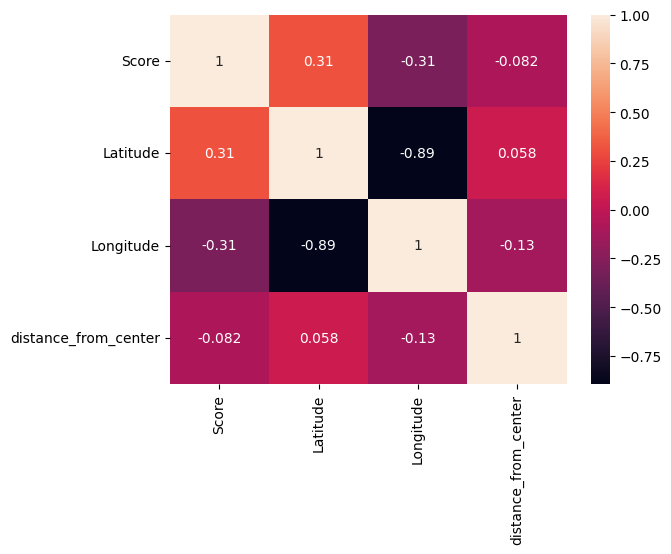

In [28]:
import seaborn as sns
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

# correlation matrix
correlation_matrix = merged_df[numerical_cols].corr()

# plot correlation matrix
sns.heatmap(correlation_matrix, annot=True)